In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings 
warnings.filterwarnings('ignore')

In [19]:
telecom_cust=pd.read_csv('../DataSet/Telco_Customer_Churn.csv')

In [20]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
telecom_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [22]:
telecom_cust.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [23]:
telecom_cust.TotalCharges=pd.to_numeric(telecom_cust['TotalCharges'],errors='coerce')

In [24]:
telecom_cust.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
telecom_cust.dropna(axis=0,inplace=True)

### Slicing 

In [32]:
telecom_cust=telecom_cust.iloc[:,1:]

In [27]:
telecom_cust['Churn'].replace(to_replace='Yes',value=1,inplace=True)
telecom_cust['Churn'].replace(to_replace='No',value=0,inplace=True)

In [28]:
telecom_cust_Dummies=pd.get_dummies(telecom_cust)

In [29]:
telecom_cust.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [30]:
# plt.figure(figsize=(15,8))
# telecom_cust.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

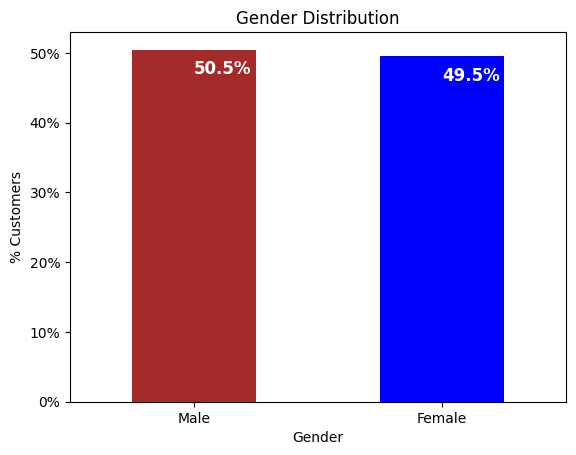

In [34]:
 
# Define colors for the bars in the chart
colors = ['brown', 'blue']
# Count occurrences of each gender in the 'gender' column of the telecom_cust DataFrame
gender_counts = telecom_cust['gender'].value_counts()
# Create a bar chart of gender distribution as a percentage of total customers
ax = (gender_counts * 100.0 / len(telecom_cust)).plot(
    kind='bar',                # Specify that the plot type is a bar chart
    stacked=True,              # Option to stack bars (not necessary with one series)
    rot=0,                     # Set rotation of x-axis labels to 0 degrees (horizontal)
    color=colors               # Assign the defined colors to the bars
)
# Format the y-axis to display percentage values
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
# Set the label for the y-axis
ax.set_ylabel('% Customers')
# Set the label for the x-axis
ax.set_xlabel('Gender')
# Set the title of the bar chart
ax.set_title('Gender Distribution')
# Calculate the total number of customers for percentage calculation
total = gender_counts.sum()
# Iterate over each bar and its corresponding gender count
for bar, count in zip(ax.patches, gender_counts):
    # Calculate the percentage of each gender
    percentage = count / total * 100
    # Add a text label inside the bar showing the percentage
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 3.5,
            f'{percentage:.1f}%',     # Format percentage to one decimal place
            fontsize=12,              # Set font size of the label
            color='white',            # Set text color to white for visibility
            weight='bold'             # Set text weight to bold
           )
# Display the plot
plt.show()
 
 

Text(0.5, 1.0, '% of Senior Citizens')

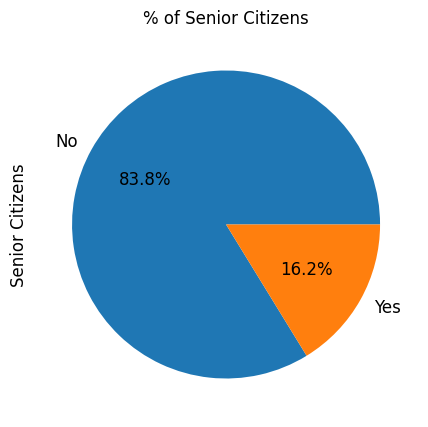

In [35]:
# Calculate the percentage of senior citizens in the 'SeniorCitizen' column
ax = (telecom_cust['SeniorCitizen'].value_counts() * 100.0 / len(telecom_cust)) \
    .plot.pie(                   # Create a pie chart
        autopct='%.1f%%',       # Format the percentage display to one decimal place
        labels=['No', 'Yes'],   # Set the labels for the pie chart slices
        figsize=(5, 5),         # Define the size of the pie chart (5x5 inches)
        fontsize=12             # Set the font size for the labels
    )

# Format the y-axis (though for a pie chart, this typically has no effect)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Set the label for the y-axis (not usually necessary for pie charts)
ax.set_ylabel('Senior Citizens', fontsize=12)

# Set the title of the pie chart
ax.set_title('% of Senior Citizens', fontsize=12)

 

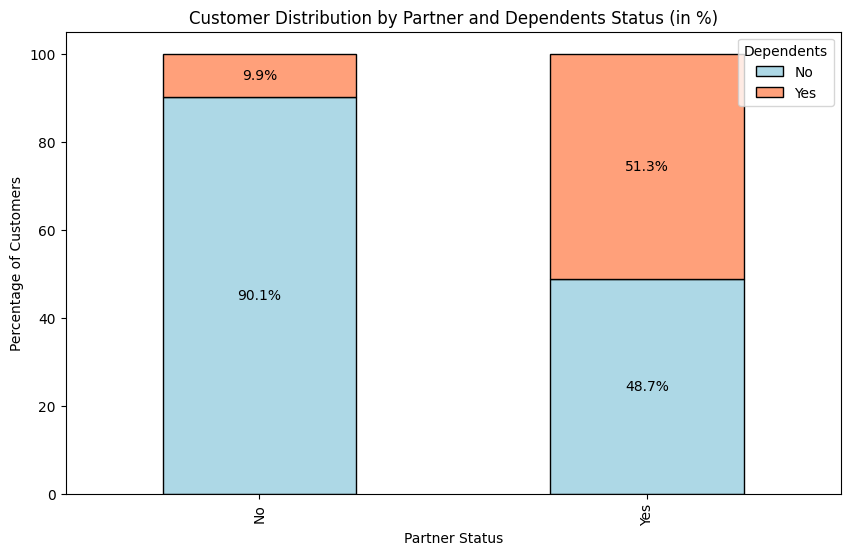

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Group the data by 'Partner' and 'Dependents', calculate counts
partner_dependents_count = telecom_cust.groupby(['Partner', 'Dependents']).size().unstack().fillna(0)

# Calculate percentage values
partner_dependents_percent = partner_dependents_count.div(partner_dependents_count.sum(axis=1), axis=0) * 100

# Plot the stacked bar chart
ax = partner_dependents_percent.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['#ADD8E6', '#FFA07A'],  # Light blue and light salmon colors
    edgecolor='black'
)

# Add percentage values on the bars
for container in ax.containers:
    labels = [f'{v:.1f}%' if v > 0 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center')

# Adding title and labels
plt.title('Customer Distribution by Partner and Dependents Status (in %)')
plt.ylabel('Percentage of Customers')
plt.xlabel('Partner Status')
plt.legend(title='Dependents', loc='upper right')

# Show the plot
plt.show()


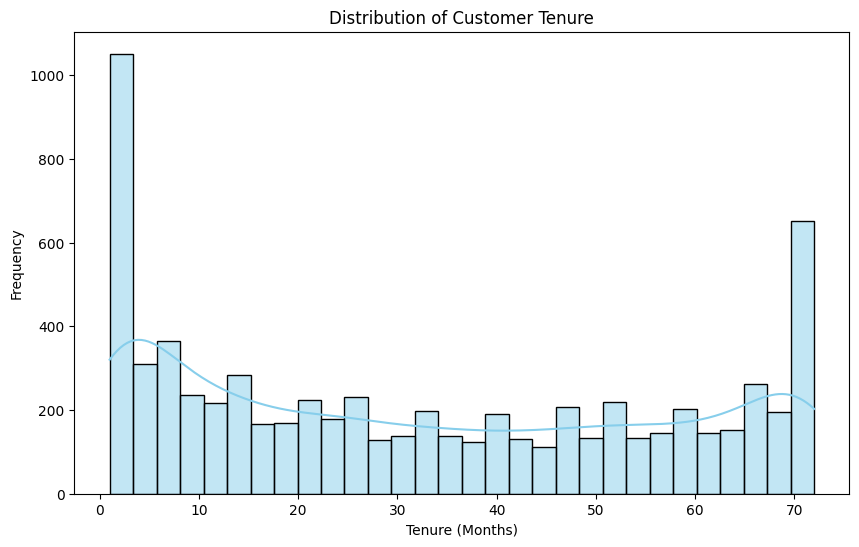

In [42]:
# Plotting a distribution plot (displot) for the 'tenure' feature
plt.figure(figsize=(10, 6))
sns.histplot(telecom_cust['tenure'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Frequency')
plt.show()


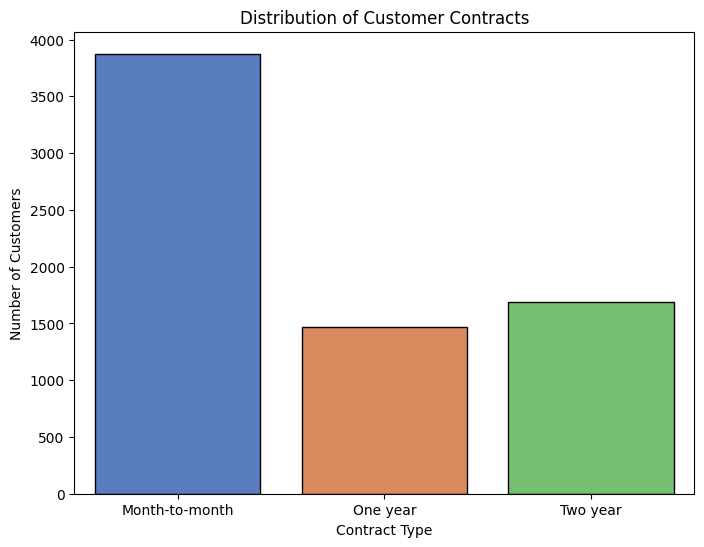

In [43]:
# Plotting a bar plot for the distribution of customer contracts
plt.figure(figsize=(8, 6))
sns.countplot(data=telecom_cust, x='Contract', palette='muted', edgecolor='black')
plt.title('Distribution of Customer Contracts')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()


Text(0.5, 1.0, 'Two Year Contract')

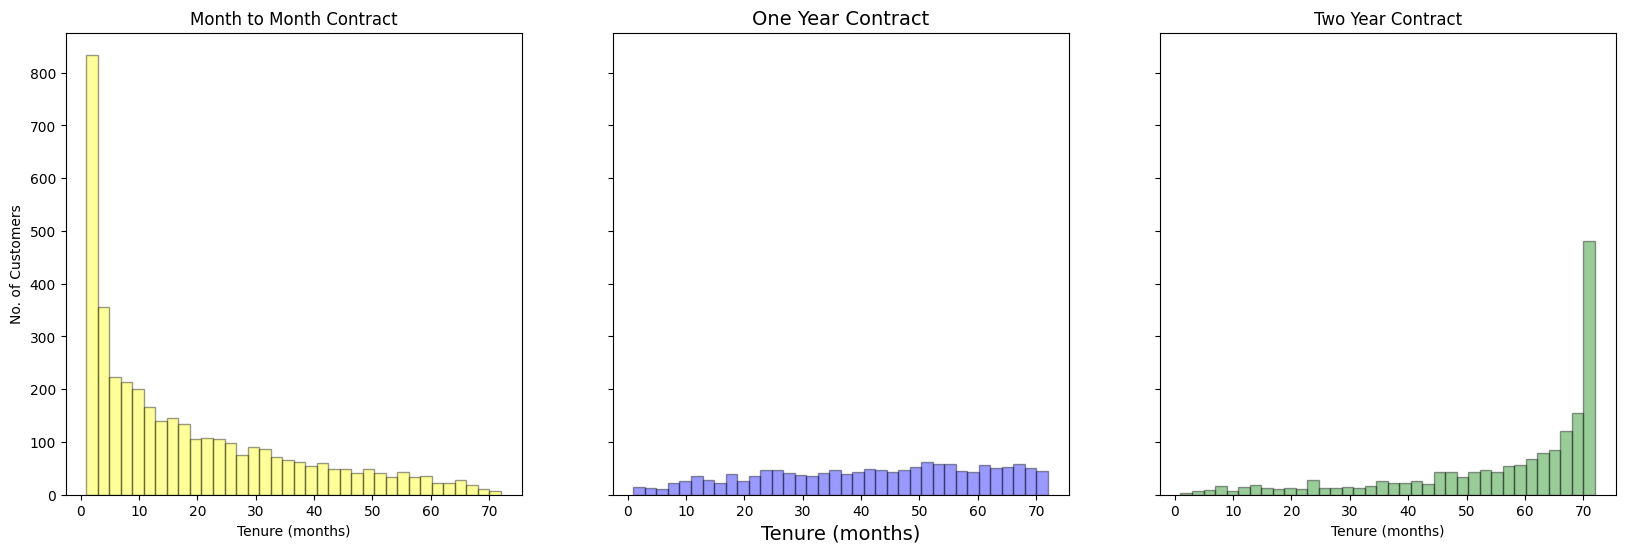

In [48]:
# Creating a figure with three subplots arranged in one row, sharing the y-axis
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 6))

# Plotting the distribution of tenure for 'Month-to-month' contracts
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Month-to-month']['tenure'],
                   hist=True,  # Show histogram
                   kde=False,  # Do not show KDE
                   bins=int(180 / 5),  # Number of bins (36 for tenure up to 180 months)
                   color='yellow',  # Color of the bars
                   hist_kws={'edgecolor': 'black'},  # Setting edge color for bars
                   kde_kws={'linewidth': 4},  # Line width for KDE (if displayed)
                   ax=ax1)  # Specify the subplot to plot on
ax.set_ylabel('No. of Customers')  # Label for the y-axis
ax.set_xlabel('Tenure (months)')  # Label for the x-axis
ax.set_title('Month to Month Contract')  # Title for the subplot

# Plotting the distribution of tenure for 'One year' contracts
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'One year']['tenure'],
                   hist=True,
                   kde=False,
                   bins=int(180 / 5),
                   color='blue',
                   hist_kws={'edgecolor': 'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax2)  # Specify the subplot to plot on
ax.set_xlabel('Tenure (months)', size=14)  # Label for the x-axis with size
ax.set_title('One Year Contract', size=14)  # Title for the subplot with size

# Plotting the distribution of tenure for 'Two year' contracts
ax = sns.distplot(telecom_cust[telecom_cust['Contract'] == 'Two year']['tenure'],
                   hist=True,
                   kde=False,
                   bins=int(180 / 5),
                   color='green',
                   hist_kws={'edgecolor': 'black'},
                   kde_kws={'linewidth': 4},
                   ax=ax3)  # Specify the subplot to plot on
ax.set_xlabel('Tenure (months)')  # Label for the x-axis
ax.set_title('Two Year Contract')  # Title for the subplot

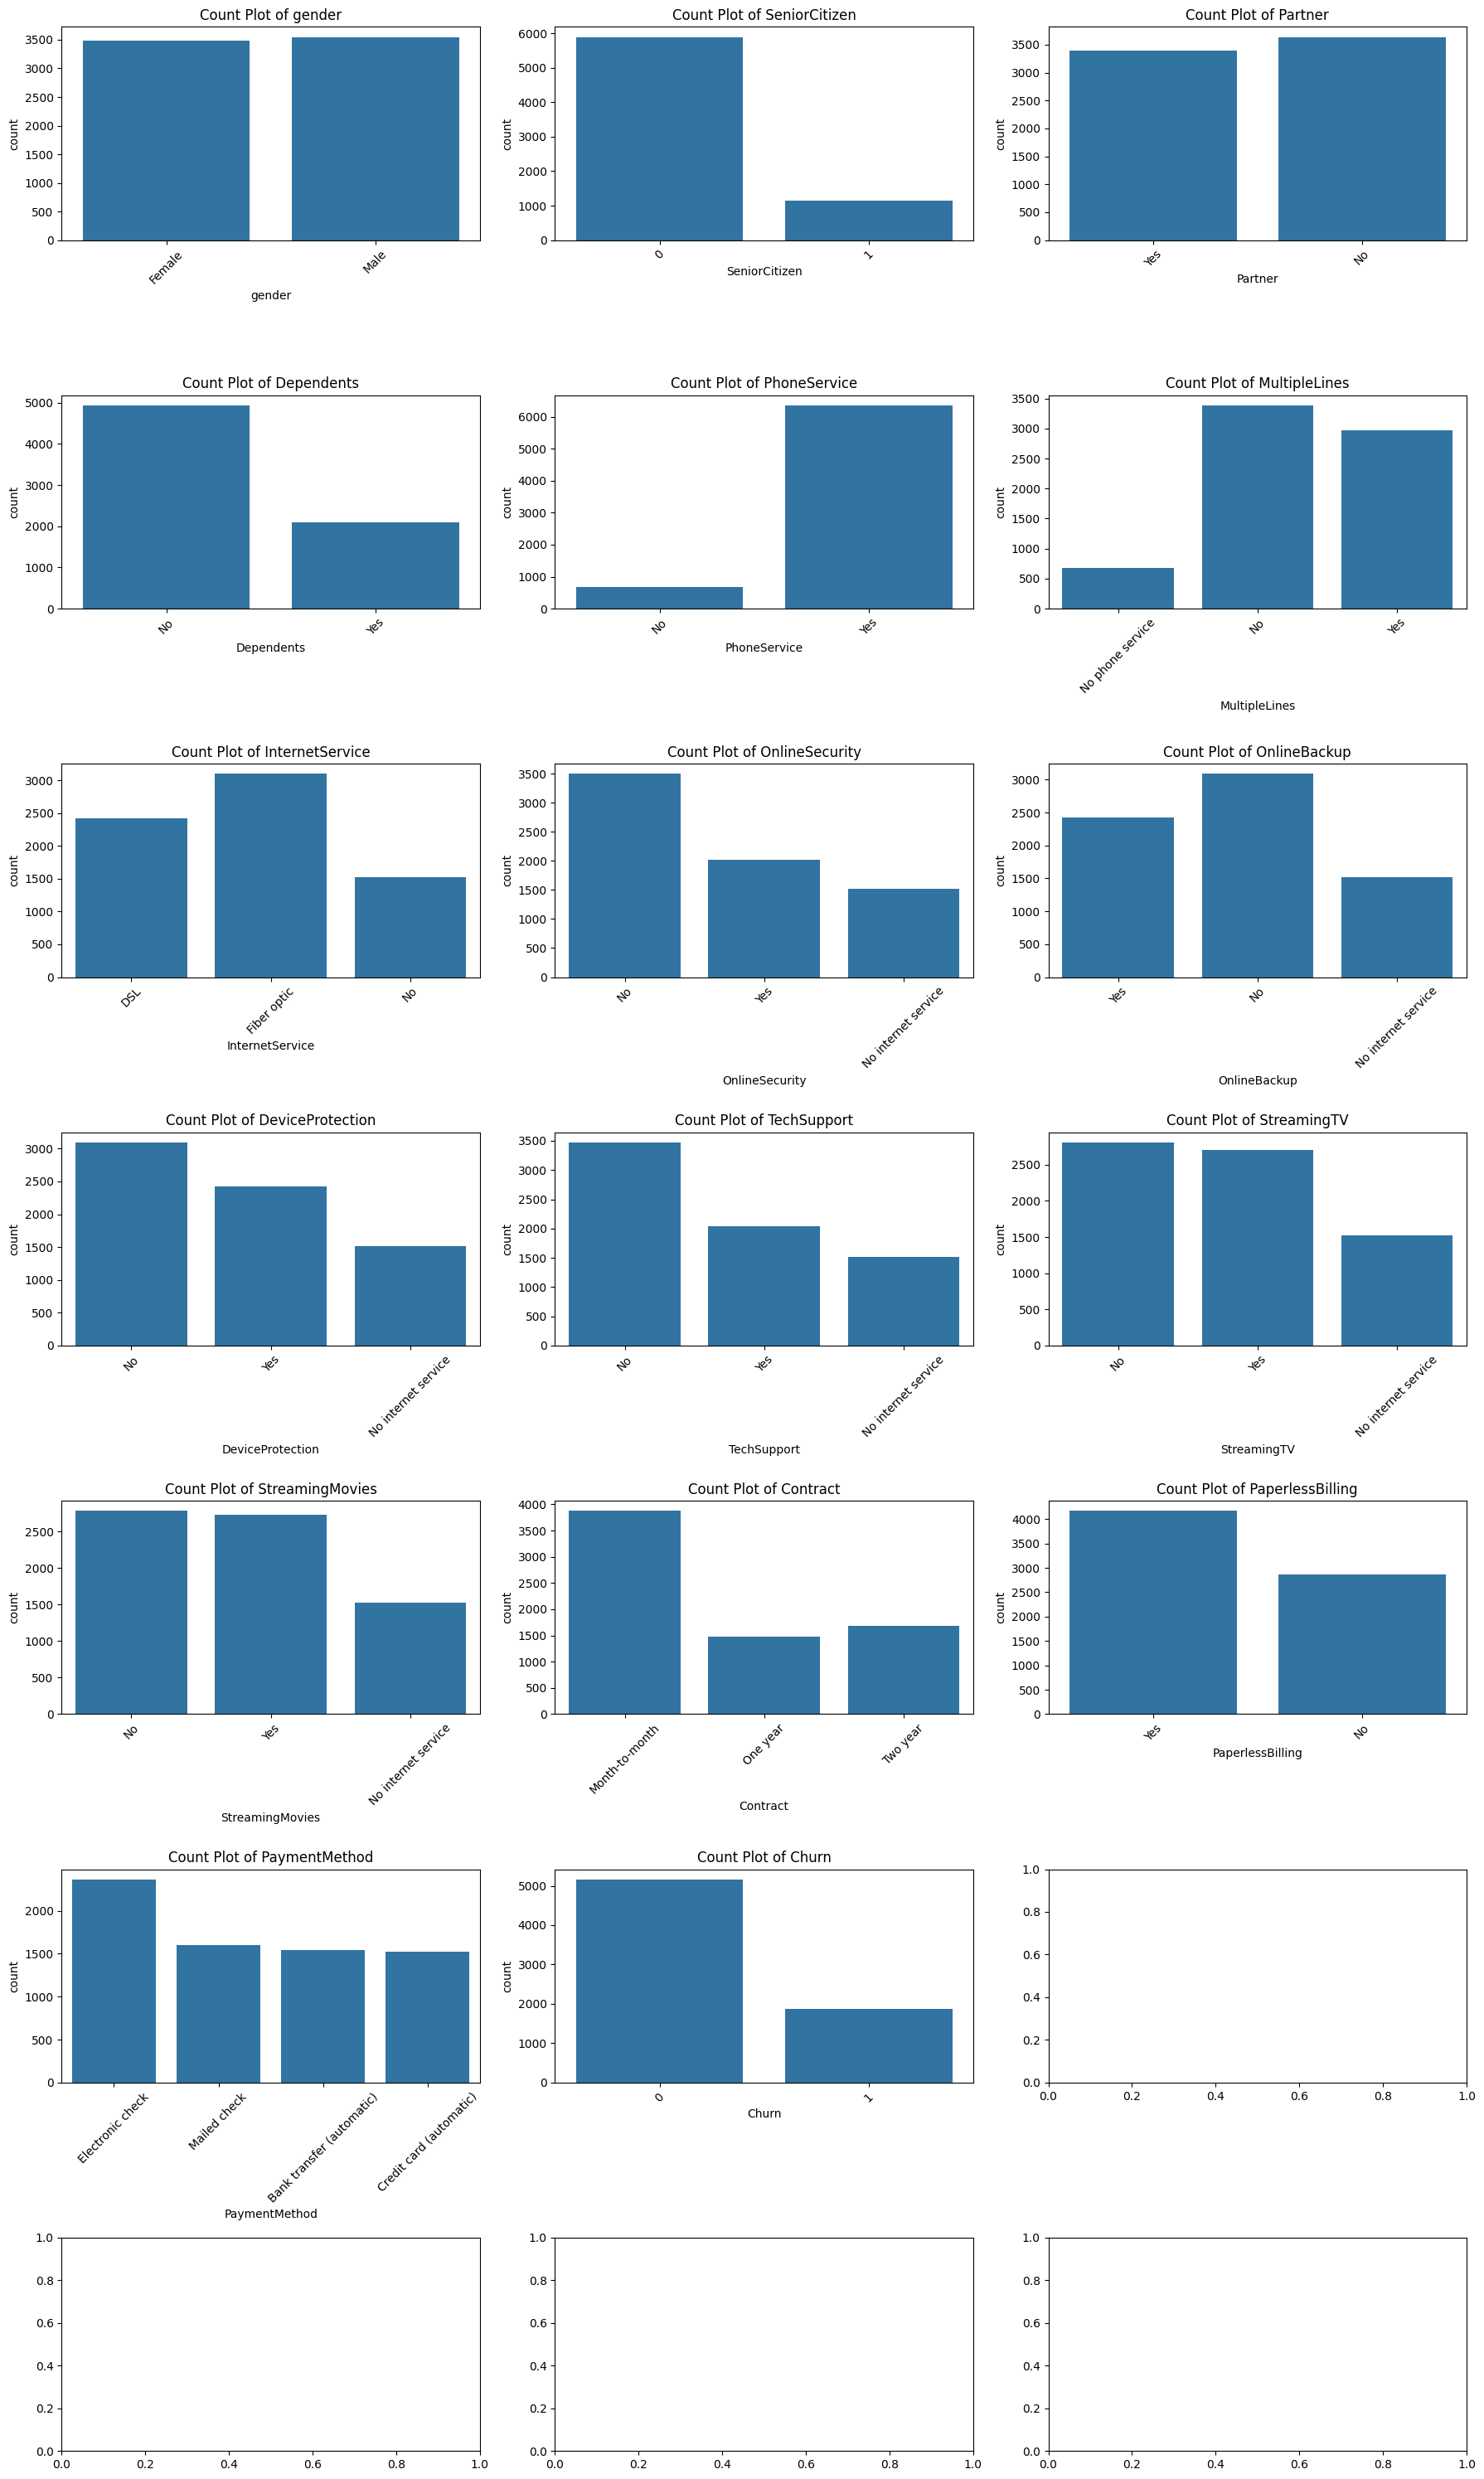

In [49]:
# Plot count plots for categorical variables
fig, axes = plt.subplots(7, 3, figsize=(18, 30))
categorical_cols = [
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'
]

for i, col in enumerate(categorical_cols):
    sns.countplot(data=telecom_cust, x=col, ax=axes[i // 3, i % 3])
    axes[i // 3, i % 3].set_title(f'Count Plot of {col}')
    axes[i // 3, i % 3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



<Axes: xlabel='MonthlyCharges', ylabel='TotalCharges'>

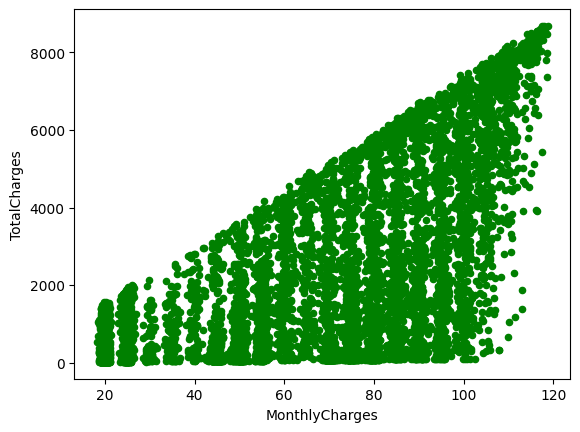

In [50]:
# Creating a scatter plot to visualize the relationship between MonthlyCharges and TotalCharges
telecom_cust[['MonthlyCharges', 'TotalCharges']].plot.scatter(x='MonthlyCharges', 
                                                              y='TotalCharges', 
                                                              color='green')  # Setting the color of the points to green

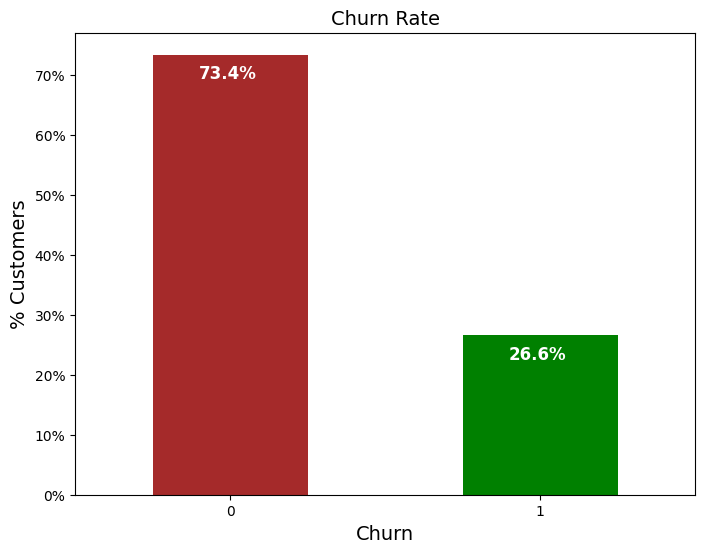

In [51]:
# Defining colors for the churn status bar plot
colors = ['brown', 'green']

# Calculating the percentage of customers who churned and plotting as a bar chart
ax = (telecom_cust['Churn'].value_counts() * 100.0 / len(telecom_cust)).plot(
    kind='bar',  # Type of plot
    stacked=True,  # Stacking bars (though not needed for a single category)
    rot=0,  # No rotation for x-axis labels
    color=colors,  # Color for the bars
    figsize=(8, 6)  # Size of the figure
)

# Formatting the y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Labeling the y-axis
ax.set_ylabel('% Customers', size=14)

# Labeling the x-axis
ax.set_xlabel('Churn', size=14)

# Setting the title of the plot
ax.set_title('Churn Rate', size=14)

# Create a list to collect the widths of the bars (for labeling)
totals = []

# Finding the values of the bars and appending to the list
for i in ax.patches:
    totals.append(i.get_width())

# Calculating the total to help with percentage labeling
total = sum(totals)

# Adding percentage labels to each bar
for i in ax.patches:
    # The x-coordinate is adjusted to center the label; height is adjusted slightly for positioning
    ax.text(i.get_x() + 0.15, i.get_height() - 4.0,
            str(round((i.get_height() / total), 1)) + '%',  # Calculate the percentage for each bar
            fontsize=12,  # Font size for the label
            color='white',  # Color of the text
            weight='bold')  # Bold text for emphasis

Text(0.5, 1.0, 'Tenure Distribution by Churn Status')

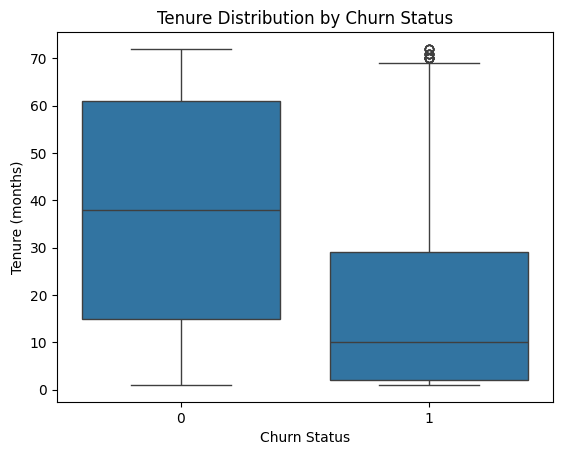

In [52]:
# Creating a box plot to visualize the distribution of tenure for different churn statuses
sns.boxplot(x=telecom_cust.Churn, y=telecom_cust.tenure)

# Setting labels and title for better context (optional)
plt.xlabel('Churn Status')  # Label for the x-axis
plt.ylabel('Tenure (months)')  # Label for the y-axis
plt.title('Tenure Distribution by Churn Status')  # Title for the plot


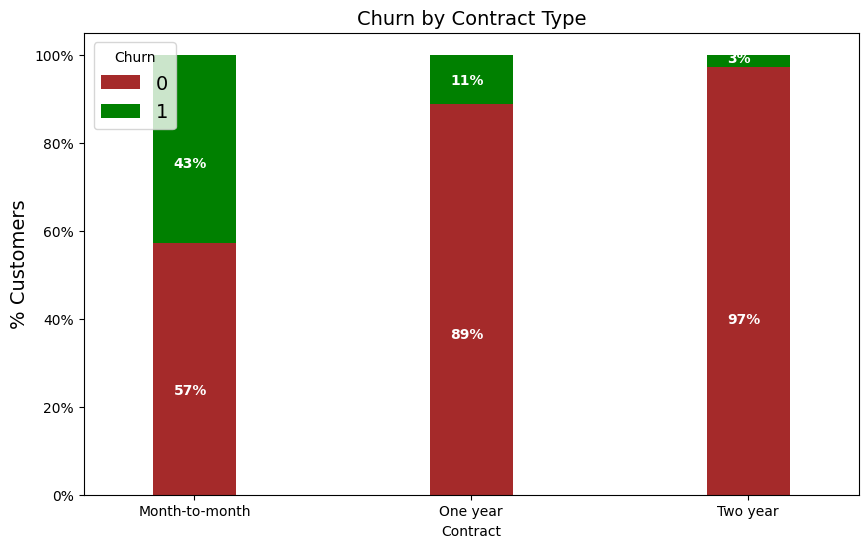

In [53]:
# Grouping the data by 'Contract' and 'Churn' to get the counts
contract_churn = telecom_cust.groupby(['Contract', 'Churn']).size().unstack()

# Plotting the churn rates by contract type as a stacked bar chart
ax = (contract_churn.T * 100.0 / contract_churn.T.sum()).T.plot(
    kind='bar',  # Type of plot
    width=0.3,  # Width of the bars
    stacked=True,  # Stacking bars for each churn status
    rot=0,  # No rotation for x-axis labels
    figsize=(10, 6),  # Size of the figure
    color=colors  # Using predefined colors for the bars
)

# Formatting the y-axis to show percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding a legend to indicate churn status
ax.legend(loc='best', prop={'size': 14}, title='Churn')

# Labeling the y-axis to indicate customer percentages
ax.set_ylabel('% Customers', size=14)

# Setting the title of the plot for context
ax.set_title('Churn by Contract Type', size=14)

# Adding data labels on the stacked bar chart for clarity
for p in ax.patches:
    width, height = p.get_width(), p.get_height()  # Get the dimensions of each bar segment
    x, y = p.get_xy()  # Get the x and y coordinates of the bar segment
    ax.annotate('{:.0f}%'.format(height),  # Format the label as a percentage
                (p.get_x() + .25 * width, p.get_y() + .4 * height),  # Position the label
                color='white',  # Color of the text
                weight='bold',  # Bold text for emphasis
                size=10)  # Font size for the label


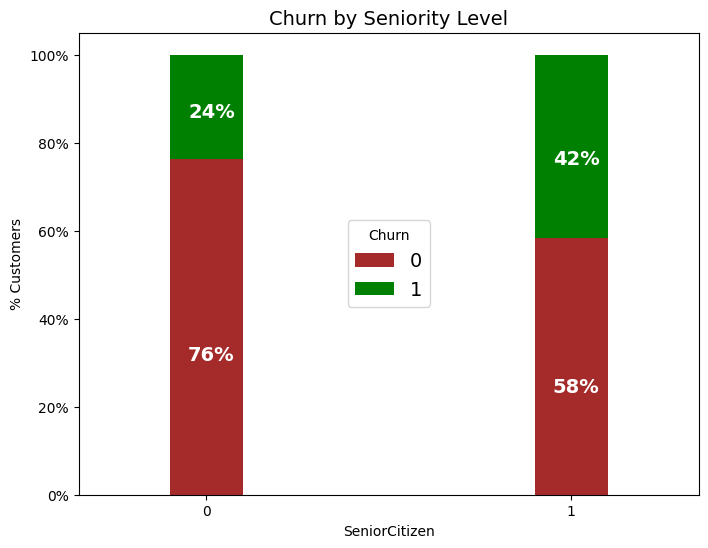

In [54]:
# Define colors for the bars in the chart
colors = ['brown', 'green']

# Group the telecom_cust DataFrame by 'SeniorCitizen' and 'Churn', then count occurrences
seniority_churn = telecom_cust.groupby(['SeniorCitizen', 'Churn']).size().unstack()

# Create a stacked bar chart showing the percentage of churn by seniority level
ax = (seniority_churn.T * 100.0 / seniority_churn.T.sum()).T.plot(
    kind='bar',               # Specify that the plot type is a bar chart
    width=0.2,               # Set the width of the bars
    stacked=True,            # Specify that the bars should be stacked
    rot=0,                   # Set rotation of x-axis labels to 0 degrees (horizontal)
    figsize=(8, 6),         # Set the figure size to 8x6 inches
    color=colors             # Assign the defined colors to the bars
)

# Format the y-axis to display percentage values
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Add a legend to the chart, centered with specified font size and title
ax.legend(loc='center', prop={'size': 14}, title='Churn')

# Set the label for the y-axis
ax.set_ylabel('% Customers')

# Set the title of the bar chart
ax.set_title('Churn by Seniority Level', size=14)

# Code to add data labels on the stacked bar chart
for p in ax.patches:  # Iterate over each patch (bar) in the plot
    width, height = p.get_width(), p.get_height()  # Get the width and height of the bar
    x, y = p.get_xy()  # Get the (x, y) coordinates of the bar's bottom-left corner
    # Add a text annotation displaying the height (percentage) of the bar
    ax.annotate('{:.0f}%'.format(height),  # Format the height as a whole number
                (p.get_x() + .25 * width, p.get_y() + .4 * height),  # Position the text
                color='white',         # Set text color to white for visibility
                weight='bold',         # Set text weight to bold
                size=14)              # Set the font size of the annotation

Text(0.5, 1.0, 'Distribution of Monthly Charges by Churn')

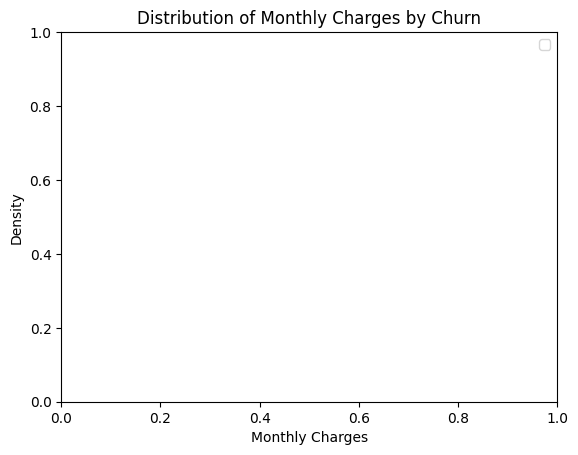

In [57]:
import seaborn as sns
# Plotting the Kernel Density Estimate (KDE) for Monthly Charges of customers who did not churn
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'No')],
                 color="Red", shade=True)  # 'shade=True' fills the area under the curve

# Overlaying the KDE for Monthly Charges of customers who churned
ax = sns.kdeplot(telecom_cust.MonthlyCharges[(telecom_cust["Churn"] == 'Yes')],
                 ax=ax, color="Blue", shade=True)  # Using 'ax=ax' to add to the existing plot

# Adding a legend to distinguish between churned and non-churned customers
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Labeling the y-axis to indicate what the values represent
ax.set_ylabel('Density')

# Labeling the x-axis to indicate what is being measured
ax.set_xlabel('Monthly Charges')

# Setting the title of the plot for clarity
ax.set_title('Distribution of Monthly Charges by Churn')

 

Text(0.5, 1.0, 'Distribution of Total Charges by Churn')

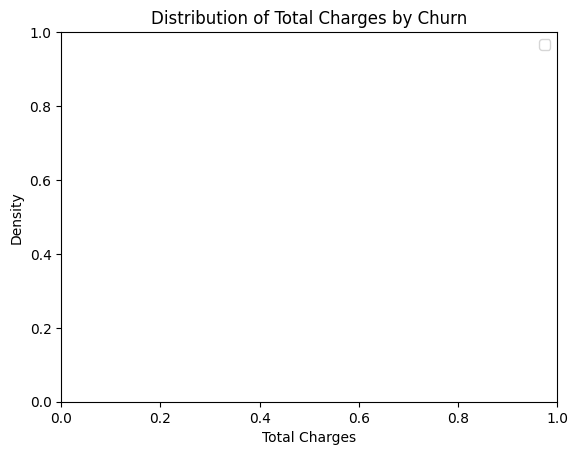

In [58]:
# Plotting the Kernel Density Estimate (KDE) for Total Charges of customers who did not churn
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'No')],
                 color="Red",  # Color for customers who did not churn
                 shade=True)  # Fill the area under the curve

# Overlaying the KDE for Total Charges of customers who churned
ax = sns.kdeplot(telecom_cust.TotalCharges[(telecom_cust["Churn"] == 'Yes')],
                 ax=ax,  # Using the same axis for overlay
                 color="Blue",  # Color for customers who churned
                 shade=True)  # Fill the area under the curve

# Adding a legend to distinguish between churned and non-churned customers
ax.legend(["Not Churn", "Churn"], loc='upper right')

# Labeling the y-axis to indicate the density of the values
ax.set_ylabel('Density')

# Labeling the x-axis to indicate what is being measured (total charges)
ax.set_xlabel('Total Charges')

# Setting the title of the plot for clarity
ax.set_title('Distribution of Total Charges by Churn')
 

In [59]:
y = telecom_cust['Churn']
X=telecom_cust.drop(telecom_cust['Churn'])

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler

In [63]:
 
# Extracting the target variable (Churn) as an array
y = telecom_cust_Dummies['Churn'].values
# Dropping the target variable from the feature set
X = telecom_cust_Dummies.drop(columns=['Churn'])
# Importing MinMaxScaler from scikit-learn for feature scaling
from sklearn.preprocessing import MinMaxScaler
# Storing the feature names for later use
features = X.columns.values
# Initializing the MinMaxScaler to scale features to a range of 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fitting the scaler to the feature set
scaler.fit(X)
# Transforming the features using the fitted scaler and converting to a DataFrame
X = pd.DataFrame(scaler.transform(X))
# Renaming the columns to maintain the original feature names
X.columns = features
 
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
 
# Importing the LogisticRegression class from scikit-learn
from sklearn.linear_model import LogisticRegression
# Initializing the logistic regression model
model = LogisticRegression()
# Fitting the model to the training data (X_train and y_train)
result = model.fit(X_train, y_train)
# After fitting, the model is now trained and ready for making predictions
 
 
 
 
# Importing metrics from scikit-learn for evaluating model performance
from sklearn import metrics
# Making predictions on the test set using the trained model
prediction_test = model.predict(X_test)
# Calculating and printing the accuracy of the model on the test set
print(metrics.accuracy_score(y_test, prediction_test))
 
 

0.7882018479033405


In [67]:
# Importing RandomForestClassifier from scikit-learn for ensemble learning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Splitting the dataset into training and testing sets (20% for testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing the Random Forest model
# n_estimators: number of trees in the forest
# oob_score: whether to use out-of-bag samples to estimate the generalization accuracy
# n_jobs: -1 allows the use of all processors
# random_state: ensures reproducibility
# max_leaf_nodes: limits the number of leaf nodes in each tree to prevent overfitting
model_rf = RandomForestClassifier(n_estimators=1000, oob_score=True, n_jobs=-1, random_state=50, max_leaf_nodes=30)

# Fitting the model to the training data (X_train and y_train)
model_rf.fit(X_train, y_train)

# Making predictions on the test set using the trained Random Forest model
prediction_test = model_rf.predict(X_test)

# Calculating and printing the accuracy of the model on the test set
print(metrics.accuracy_score(y_test, prediction_test))

 

0.7711442786069652


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
# Importing the Support Vector Classifier (SVC) from scikit-learn
from sklearn.svm import SVC

# Initializing the Support Vector Classifier with a linear kernel
model.svm = SVC(kernel='linear')

# Fitting the SVC model to the training data (X_train and y_train)
model.svm.fit(X_train, y_train)

# Making predictions on the test set using the trained SVC model
preds = model.svm.predict(X_test)

# Calculating and printing the accuracy of the model on the test set
accuracy = metrics.accuracy_score(y_test, preds)
print(accuracy)


0.8208955223880597


[[818 215]
 [296  78]]


0.7810945273631841

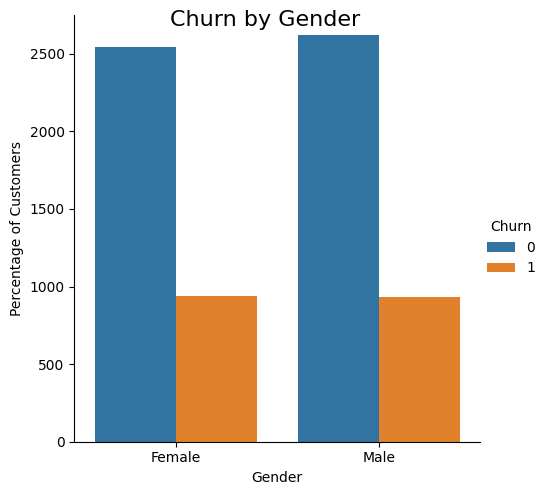

In [68]:
 
# Create the Confusion matrix
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test,preds))
 # Creating a categorical plot to visualize counts of churn by gender
ax1 = sns.catplot(
    x="gender",               # x-axis variable
    kind="count",             # type of plot (count plot)
    hue="Churn",              # variable used for coloring (Churn Yes/No)
    data=telecom_cust,       # the dataset being used
    estimator=lambda x: sum(x==0) * 100.0 / len(x)  # Custom estimator for percentage
)
# Additional customization can be added to enhance the plot (optional)
ax1.set_axis_labels('Gender', 'Percentage of Customers')  # Labeling axes
ax1.fig.suptitle('Churn by Gender', fontsize=16)         # Adding a title
 
 
 
 
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)
 
 